<a href="https://colab.research.google.com/github/Anshuman33/face-attendance/blob/main/Face%20Detection%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install MTCNN Package

In [1]:
!pip install mtcnn

     |████████████████████████████████| 2.3 MB 4.7 MB/s 


# Download the dataset from kaggle

*Upload the Kaggle API token file before running the cell below*

In [2]:
# Create a folder named .kaggle
!mkdir -p ~/.kaggle/

# Copy the kaggle.json API token file to this directory
!cp kaggle.json ~/.kaggle/

# Change permission so that only you can read-write
!chmod 600 /root/.kaggle/kaggle.json

# Downloading the dataset
!kaggle datasets download -d dansbecker/5-celebrity-faces-dataset

  0% 0.00/5.03M [00:00<?, ?B/s]
100% 5.03M/5.03M [00:00<00:00, 45.9MB/s]


# Importing the libraries

In [3]:
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import zipfile
import glob
import os
from mtcnn import MTCNN

# Coding the utilities

In [4]:
def loadImage(src_path):
  # Read the image
  img = Image.open(src_path).resize((256, 256))
  np_image = np.array(img)

  # If the number of channels is 1, then convert it into 3 channeled image  
  if(len(np_image.shape) < 3):
    np_image = np.stack([np_image]*3, axis=2)
  elif np_image.shape[2] > 3:
    np_image = np_image[:,:,:3]

  return np_image

def crop_and_save_faces(image, face_boxes, target_folder_path, base_image_name):
  i = 1
  for (x, y, w, h) in face_boxes:
    # Crop the region of interest i.e. face
    cropped_image = image[y:y+h, x:x+w]
    cropped_image = Image.fromarray(cropped_image)
    cropped_image = cropped_image.resize((128, 128))

    # Save the cropped image in target folder
    filename, ext = os.path.splitext(base_image_name)
    new_filename = f"{filename}_{i}.{ext}" 
    target_filepath = os.path.join(target_folder_path, new_filename) 
    cropped_image.save(target_filepath)
    i += 1


def draw_bounding_boxes(image, bounding_boxes):
  color = (255, 255, 0)  # Yellow color
  for (x, y, w, h) in bounding_boxes:
    cv2.rectangle(image, (x, y), (x + w, y + h), color,2)

# Extracting the dataset from zip

In [5]:
# Extract the dataset
zf = zipfile.ZipFile("5-celebrity-faces-dataset.zip")
zf.extractall('.')
zf.close()

# Extracting faces from training set

## Loading the model

In [6]:
# Get the MTCNN face detector
detector = MTCNN()

## Extracting faces using loaded model

In [7]:
# Set base and target dir paths
BASE_FOLDER = "train/"
TARGET_FOLDER = "cropped_images_celebrity/train"

In [8]:
np_images = []
classes = []
for dirname in os.listdir(BASE_FOLDER):
  source_class_path = os.path.join(BASE_FOLDER, dirname)

  # Create the target directory if not exists
  target_class_path = os.path.join(TARGET_FOLDER, dirname)
  if not os.path.exists(target_class_path):
    os.makedirs(target_class_path)

  for filename in os.listdir(source_class_path):
    
    # Load the image
    image_path = os.path.join(source_class_path, filename)
    image = loadImage(image_path)

    # Detect faces  
    detections = detector.detect_faces(image)
    
    face_boxes = []
    for detection in detections:
        face_boxes.append(detection["box"])
    
    # Crop and save faces in target folder
    crop_and_save_faces(image, face_boxes, target_class_path, filename)

    # Draw the bounding boxes on a copy of image
    image_copy = image.copy()
    draw_bounding_boxes(image_copy, face_boxes)
        
    # Store the bounding box image in the array
    np_images.append(image_copy)
    classes.append(dirname)

## Visualizing the results

In [9]:
n = len(np_images)
rows = np.ceil(n/5)
indices = np.arange(0, len(np_images))
plotNo = 1
plt.figure(figsize=(20, 4*rows))
for i in indices:
  plt.subplot(rows, 5, plotNo)
  plt.imshow(np_images[i])
  plt.title(classes[i])
  plotNo += 1

Output hidden; open in https://colab.research.google.com to view.

# Extracting faces from validation set

## Loading the model

In [ ]:
# Get the MTCNN face detector
detector = MTCNN()

## Extracting faces using loaded model

In [10]:
# Set base and target dir paths
BASE_FOLDER = "val/"
TARGET_FOLDER = "cropped_images_celebrity/val"

In [11]:
np_images = []
classes = []
for dirname in os.listdir(BASE_FOLDER):
  source_class_path = os.path.join(BASE_FOLDER, dirname)

  # Create the target directory if not exists
  target_class_path = os.path.join(TARGET_FOLDER, dirname)
  if not os.path.exists(target_class_path):
    os.makedirs(target_class_path)

  for filename in os.listdir(source_class_path):
    
    # Load the image
    image_path = os.path.join(source_class_path, filename)
    image = loadImage(image_path)

    # Detect faces  
    detections = detector.detect_faces(image)

    face_boxes = []
    for detection in detections:
        face_boxes.append(detection["box"])

    # Crop and save faces in target folder
    crop_and_save_faces(image, face_boxes, target_class_path, filename)

    # Draw the bounding boxes on a copy of image
    image_copy = image.copy()
    draw_bounding_boxes(image_copy, face_boxes)
        
    # Store the bounding box image in the array
    np_images.append(image_copy)
    classes.append(dirname)

## Visualizing the results

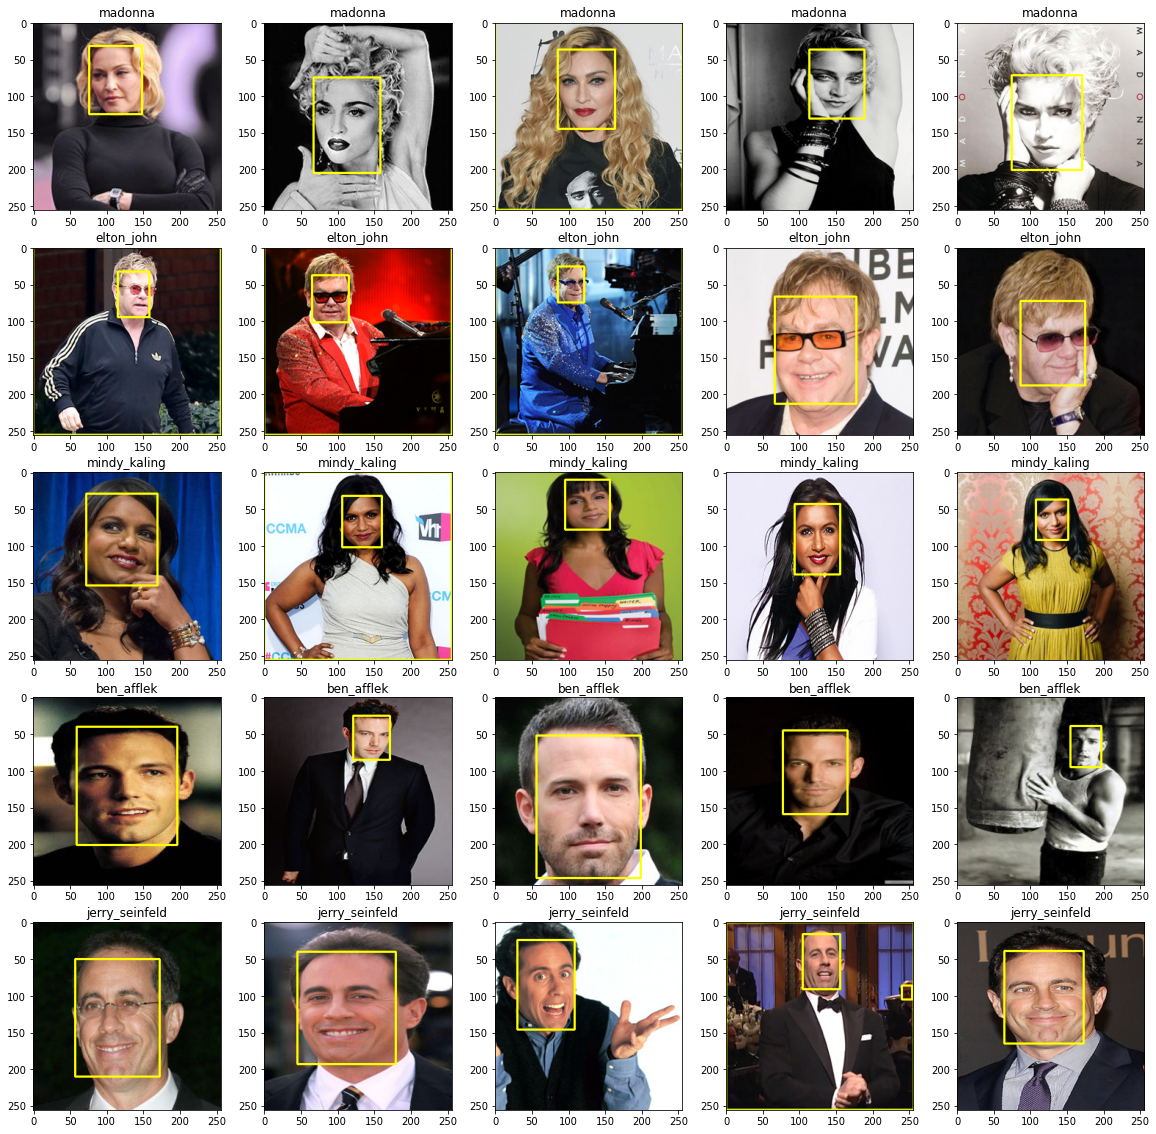

In [12]:
n = len(np_images)
rows = np.ceil(n/5)
indices = np.arange(0, len(np_images))
plotNo = 1
plt.figure(figsize=(20, 4*rows))
for i in indices:
  plt.subplot(rows, 5, plotNo)
  plt.imshow(np_images[i])
  plt.title(classes[i])
  plotNo += 1

# Copy the cropped images folder into drive

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import shutil

In [15]:
shutil.copytree('./cropped_images_celebrity', '/content/drive/MyDrive/AI Project/cropped_images_celebrity/')

'/content/drive/MyDrive/AI Project/cropped_images_celebrity/'